In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import spearmanr

%matplotlib inline

In [2]:
crime = pd.read_csv('crime_borough_monthly.csv')
collision = pd.read_csv('collision_borough_monthly.csv')

In [3]:
crime.head()

,date,borough,count
0,NaN,BROOKLYN,209
1,NaN,BRONX,108
2,NaN,MANHATTAN,142
3,NaN,QUEENS,170
4,NaN,STATEN ISLAND,22


In [4]:
collision.head()

,date,borough,count
0,201207,NaN,3838
1,201207,STATEN ISLAND,768
2,201207,MANHATTAN,3654
3,201207,BRONX,1641
4,201207,BROOKLYN,3885


In [5]:
crime.tail()

,date,borough,count
1769,201612.0,BRONX,7600
1770,201612.0,QUEENS,6833
1771,201612.0,BROOKLYN,9813
1772,201612.0,MANHATTAN,8402
1773,201612.0,STATEN ISLAND,1500


In [6]:
type(collision.date[0])

numpy.int64

In [7]:
crime.describe()

,date,count
count,1769.000000,1774.000000
mean,198131.421707,3144.222097
std,12202.025943,4616.962016
min,101502.000000,1.000000
25%,199301.000000,1.000000
50%,200208.000000,18.000000
75%,200909.000000,8309.000000
max,201612.000000,14558.000000


In [8]:
crime_date = []
for x in crime.date:
    try:
        crime_date.append(int(x))
    except:
        crime_date.append(0)

In [9]:
type(crime.date[0])

numpy.float64

In [10]:
crime.date = crime_date

In [11]:
crime_collision = pd.merge(collision, crime, how='inner', on=['date','borough'])

In [12]:
crime_collision

,date,borough,count_x,count_y
0,201207,STATEN ISLAND,768,2037
1,201207,MANHATTAN,3654,10633
2,201207,BRONX,1641,9269
3,201207,BROOKLYN,3885,14300
4,201207,QUEENS,3204,8985
5,201208,MANHATTAN,3594,10867
6,201208,BROOKLYN,3916,14240
7,201208,STATEN ISLAND,849,2006
8,201208,QUEENS,3150,8726
9,201208,BRONX,1665,9743


In [13]:
crime_collision

,date,borough,count_x,count_y
0,201207,STATEN ISLAND,768,2037
1,201207,MANHATTAN,3654,10633
2,201207,BRONX,1641,9269
3,201207,BROOKLYN,3885,14300
4,201207,QUEENS,3204,8985
5,201208,MANHATTAN,3594,10867
6,201208,BROOKLYN,3916,14240
7,201208,STATEN ISLAND,849,2006
8,201208,QUEENS,3150,8726
9,201208,BRONX,1665,9743


In [14]:
cols_dff=crime_collision.shape[1]

In [15]:
crime.shape

(1774, 3)

In [16]:
cols_dff

4

In [17]:
comp_spearman = crime_collision.corr(method="spearman").iloc[:3,:4]
comp_pearson = crime_collision.corr(method="pearson").iloc[:3,:4]
print(comp_spearman)
print(comp_pearson)

             date   count_x   count_y
date     1.000000  0.017529 -0.047082
count_x  0.017529  1.000000  0.756456
count_y -0.047082  0.756456  1.000000
             date   count_x   count_y
date     1.000000 -0.002223 -0.028760
count_x -0.002223  1.000000  0.791719
count_y -0.028760  0.791719  1.000000


Text(0.5,1,'New York City Yearly Crime Data and Collision')

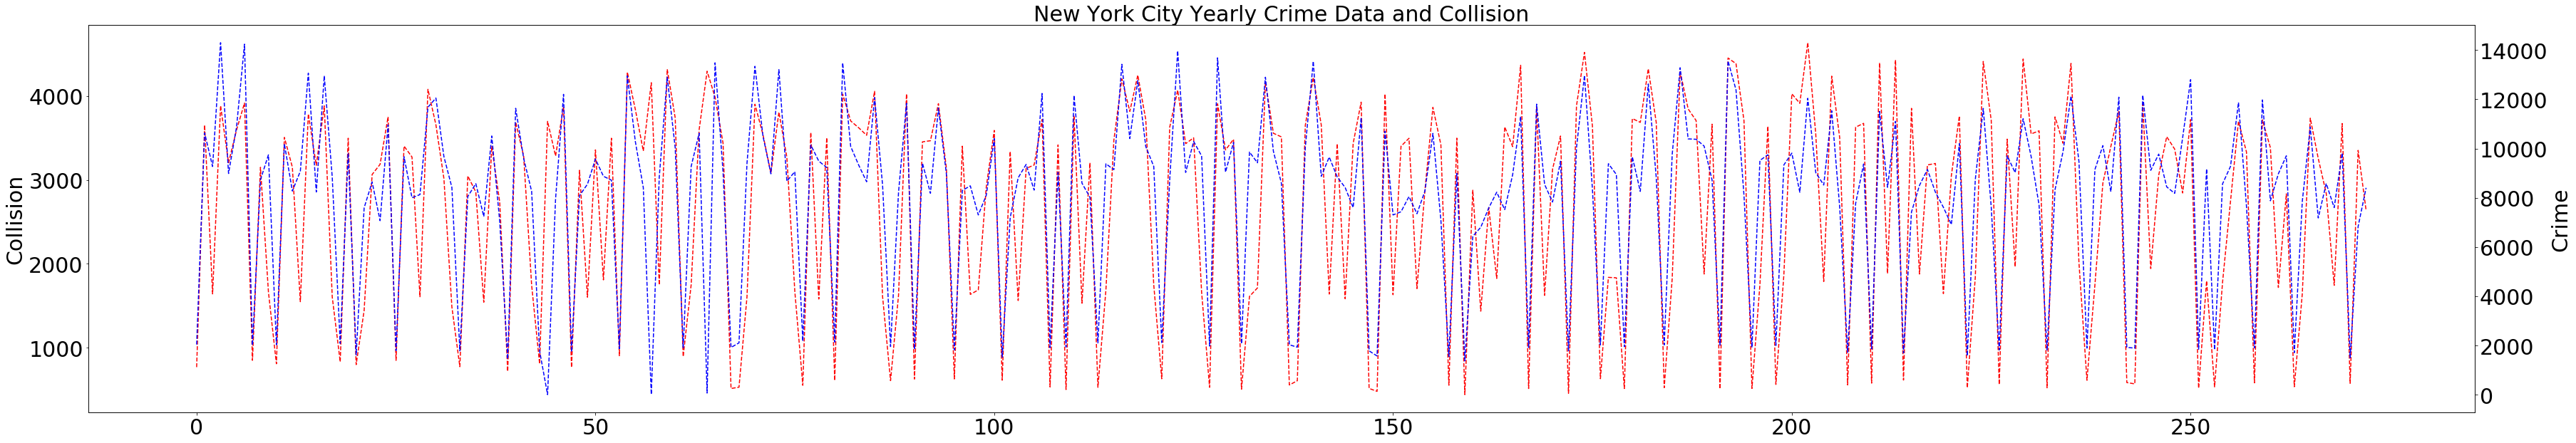

In [30]:
y1= crime_collision.count_x
y2 = crime_collision.count_y

matplotlib.rc('font', size=30)
matplotlib.rc('axes', titlesize=30)

fig = plt.figure(figsize = (60,10) )
ax1 = fig.add_subplot(111)
ax1.plot(y1,'r-',linestyle='--')
ax1.set_ylabel('Collision')
ax2 = ax1.twinx()
ax2.plot(y2,'b-',linestyle='--')
ax2.set_ylabel('Crime')

plt.title("New York City Yearly Crime Data and Collision")